### Imports and get sample data

In [18]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import random

centers = random.randrange(2, 5)

X, y = make_blobs(n_samples=20, centers=centers, n_features=2)

## old sample data
# X = np.array([[1, 2],
#              [1.5, 1.8],
#              [5, 8],
#              [8, 8],
#              [1, 0.6],
#              [9, 11],
#              [8, 2],
#              [10, 2],
#              [9, 3],])
# plt.scatter(X[:,0], X[:,1], s=150)
# plt.show()

# list of colors to use for plotting
colors = 10 * ["g", "r", "c", "b", "k"]

### Class, fit, predict modules

In [19]:
class Mean_Shift:
    def __init__(self, radius=None, radius_norm_step=100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
        
    def fit(self, data):
        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)  # find center of all data
            all_data_norm = np.linalg.norm(all_data_centroid)  # find magnitude of the center
            self.radius = all_data_norm / self.radius_norm_step
        
        centroids = {}
        
        for i in range(len(data)):
            centroids[i] = data[i]
        
        weights = [i for i in range(self.radius_norm_step)[::-1]]  # get a list from 1 to radius_norm_step, reverse it
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                for featureset in data:
                    distance = np.linalg.norm(featureset - centroid)
                    if distance == 0:
                        distance = 0.0000001
                    # more steps that we have to take, that's further, lower weight
                    weight_index = int(distance / self.radius)  
                    # if weight is > max range, assign it to max range
                    if weight_index > self.radius_norm_step - 1:
                        weight_index = self.radius_norm_step - 1
                    # squaring weight and multiplying against feature
                    # probably area for improvement
                    to_add = (weights[weight_index] ** 2) * [featureset]
                    # add two lists
                    in_bandwidth += to_add
                    
#                     if np.linalg.norm(featureset - centroid) < self.radius:
#                         in_bandwidth.append(featureset)
                        
                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))  # convert array to tuple for use later
                
            uniques = sorted(list(set(new_centroids)))  # can get set of tuple but not np array
            
            to_pop = []
            
            # for the sorted list of unique new centroids, want to see if any are really close but not exactly
            # want to get rid of those that are, since only want one centroid in an area
            # check if in to pop
            # check if next centroid is equal to prev
            for i in uniques:
                # not inspecting centroids in radius i, since i will be popped. break, don't pass
                if i in to_pop: 
                    break
                for ii in uniques:
                    if i == ii:
                        pass
                    # if centroids are close enough, add them to to_pop, to remove later
                    elif np.linalg.norm(np.array(i) - np.array(ii)) <= self.radius and ii not in to_pop:
                        to_pop.append(ii)
            
            for i in to_pop:
                uniques.remove(i)
            
            prev_centroids = dict(centroids)
            
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])  # centroids are also ordered since uniques is ordered
                
            optimized = True
            
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                    
                if not optimized:
                    break
            
            if optimized:
                break
                
        self.centroids = centroids
        
        self.classifications = {}
        
        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))  # index of whichever centroid has min distance to the feature
            self.classifications[classification].append(featureset)  # add that feature to the dictionary as a value to the centroid key
        
    def predict(self, data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distance)) 
        return classification

### Create and test algo

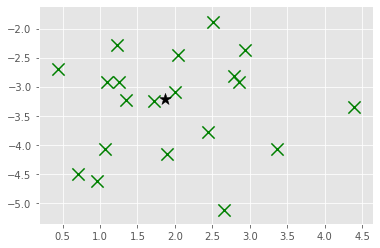

In [20]:
clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color=color, s=150)

# plt.scatter(X[:,0], X[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()